#  BHARAT INTERN

# DATA SCIENE INTERN

 ## Author : Mrunali Ramchandra Powar 

# Task 2 : Titanic Classification

The dataset is available at Kaggle : https://www.kaggle.com/datasets/yasserh/titanic-dataset

In [1]:
## Importing Libaries to be used
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#    Importing Data To Be Used

In [2]:
data=pd.read_csv("D://All Datas//csv files//Titanic-Dataset.csv")
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Exploring Missing Data 

In [4]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
data.drop(["Age","Cabin"],axis=True,inplace=True)
data

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,0,0,111369,30.0000,C


In [6]:
data.dropna(inplace=True)
data

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,0,0,111369,30.0000,C


In [7]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

#  Data Visualization

In [8]:
sns.set()

<Axes: xlabel='Sex', ylabel='count'>

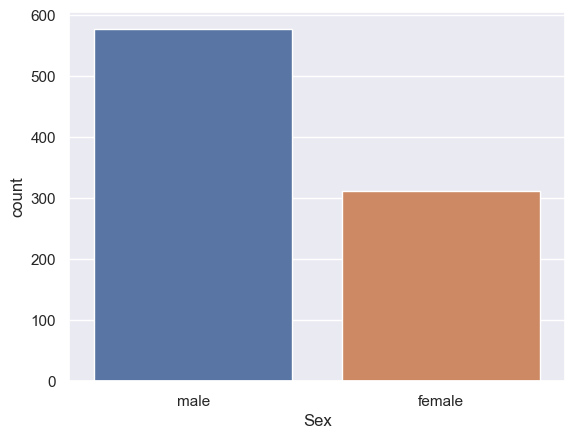

In [9]:
## Countplot on the basis of Gender
sns.countplot(data,x="Sex")

<Axes: xlabel='Survived', ylabel='count'>

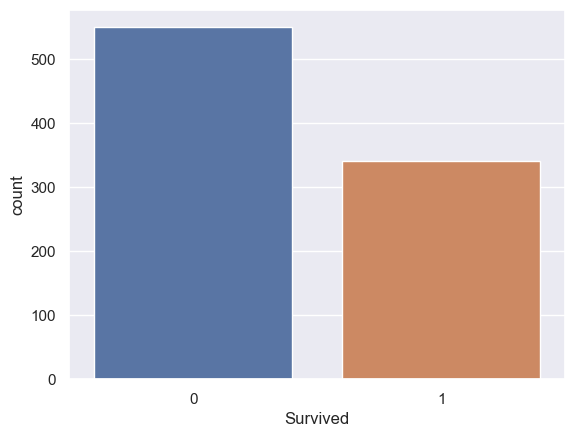

In [10]:
## Countplot on basis of Survived
sns.countplot(data,x="Survived")


<Axes: xlabel='Survived', ylabel='count'>

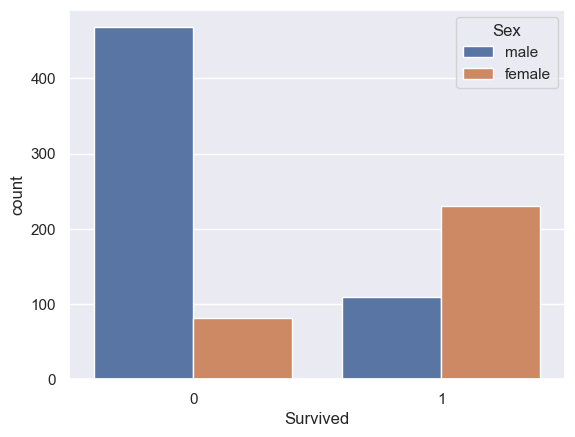

In [11]:
## Countplot on the basis of Survived and Sex
sns.countplot(data,x="Survived",hue="Sex")

# LABEL ENCODING

In [12]:
data.drop(["Name","Ticket"],axis=True,inplace=True)
data

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,1,0,3,male,1,0,7.2500,S
1,2,1,1,female,1,0,71.2833,C
2,3,1,3,female,0,0,7.9250,S
3,4,1,1,female,1,0,53.1000,S
4,5,0,3,male,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,887,0,2,male,0,0,13.0000,S
887,888,1,1,female,0,0,30.0000,S
888,889,0,3,female,1,2,23.4500,S
889,890,1,1,male,0,0,30.0000,C


In [13]:
l1=LabelEncoder()
data['Sex']= l1.fit_transform(data['Sex'])
data['Embarked']= l1.fit_transform(data['Embarked'])

In [14]:
data

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,1,0,3,1,1,0,7.2500,2
1,2,1,1,0,1,0,71.2833,0
2,3,1,3,0,0,0,7.9250,2
3,4,1,1,0,1,0,53.1000,2
4,5,0,3,1,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,887,0,2,1,0,0,13.0000,2
887,888,1,1,0,0,0,30.0000,2
888,889,0,3,0,1,2,23.4500,2
889,890,1,1,1,0,0,30.0000,0


# Data Splitting

In [15]:
y=data["Survived"]
x=data.drop("Survived",axis=1)

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [17]:
x_train

,PassengerId,Pclass,Sex,SibSp,Parch,Fare,Embarked
6,7,1,1,0,0,51.8625,2
576,577,2,0,0,0,13.0000,2
445,446,1,1,0,2,81.8583,2
74,75,3,1,0,0,56.4958,2
670,671,2,0,1,1,39.0000,2
...,...,...,...,...,...,...,...
107,108,3,1,0,0,7.7750,2
271,272,3,1,0,0,0.0000,2
862,863,1,0,0,0,25.9292,2
436,437,3,0,2,2,34.3750,2


In [18]:
y_train

6      0
576    1
445    1
74     1
670    1
      ..
107    1
271    1
862    1
436    0
103    0
Name: Survived, Length: 595, dtype: int64

# Model Selection

In [19]:
from sklearn.metrics import accuracy_score

In [20]:
models=[]
algorithem=[]

# KNN

In [21]:
from sklearn.neighbors import KNeighborsClassifier

In [22]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)
acc=accuracy_score(y_test, y_pred)
acc

0.5850340136054422

In [23]:
models.append(acc)
print(models)
algorithem.append("knn")
print(algorithem)

[0.5850340136054422]
['knn']


# Decision Tree

In [24]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [25]:
dt = tree.DecisionTreeClassifier(max_depth=10)
y_pred = dt.fit(x_train, y_train).predict(x_test)
acc2=accuracy_score(y_test, y_pred)
acc2

0.7346938775510204

In [26]:
models.append(acc2)
print(models)
algorithem.append("Decision Tree")
print(algorithem)

[0.5850340136054422, 0.7346938775510204]
['knn', 'Decision Tree']


# Random Forest

In [27]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier(max_depth=2, random_state=0)
y_pred = rf.fit(x_train, y_train).predict(x_test)
acc3=accuracy_score(y_test, y_pred)
acc3

0.7959183673469388

In [28]:
rf.feature_importances_

array([0.02769097, 0.25284402, 0.42307724, 0.03829431, 0.03838733,
       0.15639931, 0.06330682])

In [29]:
x_train.columns

Index(['PassengerId', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Embarked'], dtype='object')

In [30]:
pd.DataFrame((rf.feature_importances_*100),x_train.columns)

,0
PassengerId,2.769097
Pclass,25.284402
Sex,42.307724
SibSp,3.829431
Parch,3.838733
Fare,15.639931
Embarked,6.330682


In [31]:
models.append(acc3)
print(models)
algorithem.append("Random Forest")
print(algorithem)

[0.5850340136054422, 0.7346938775510204, 0.7959183673469388]
['knn', 'Decision Tree', 'Random Forest']


# Support Vector Machine

In [32]:
from sklearn.svm import SVC
clf=SVC()
y_pred = clf.fit(x_train, y_train).predict(x_test)
acc4=accuracy_score(y_test, y_pred)
acc4

0.6428571428571429

In [33]:
models.append(acc4)
print(models)
algorithem.append("SVM")
print(algorithem)

[0.5850340136054422, 0.7346938775510204, 0.7959183673469388, 0.6428571428571429]
['knn', 'Decision Tree', 'Random Forest', 'SVM']


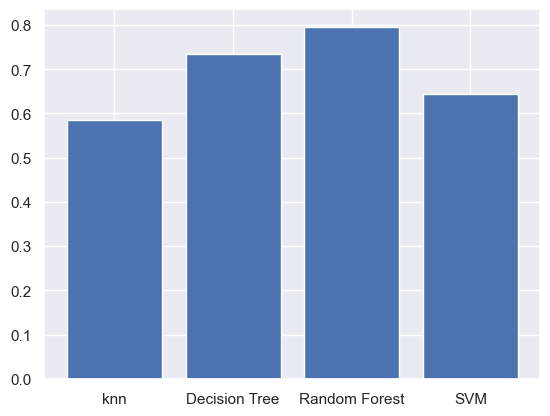

In [34]:
plt.bar(algorithem,models)
plt.show()